Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

Top 10 Profitable Products:
                             Description  Total_Sales  Average_Price  \
2780            REGENCY CAKESTAND 3 TIER    132870.40      12.429423   
3716  WHITE HANGING HEART T-LIGHT HOLDER     93823.85       2.891362   
1771             JUMBO BAG RED RETROSPOT     83236.76       2.013057   
2355                       PARTY BUNTING     67687.53 

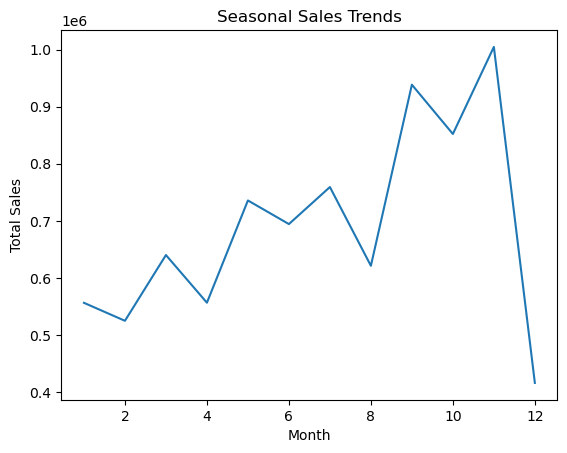


Cleaned dataset exported to: cleaned_online_retail.csv


'\nKey Insights:\n1. Highlight slow-moving products based on sales trends.\n2. Suggest inventory optimization strategies for high-performing months.\n3. Derive actionable recommendations for overstocked products.\n'

In [5]:
# Retail Business Performance & Profitability Analysis

# Step 1: Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load Dataset
  # Replace with the correct file path
data = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Desktop\\CSV\\online_retail_.csv')

# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

# Display the first few rows
data.head()

# Step 3: Data Cleaning
# Convert 'InvoiceDate' to datetime format
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Add 'Total Sales' column
data['Total Sales'] = data['Quantity'] * data['Price']

# Handle missing values in 'Description' and 'Customer ID'
# Filling missing 'Description' with 'Unknown' and dropping rows with missing 'Customer ID'
data['Description'] = data['Description'].fillna('Unknown')
data = data.dropna(subset=['Customer ID'])

# Step 4: Profit Analysis
# Group by 'Description' and calculate total sales and average price
profit_analysis = data.groupby('Description').agg(
    Total_Sales=('Total Sales', 'sum'),
    Average_Price=('Price', 'mean'),
    Total_Quantity=('Quantity', 'sum')
).reset_index()

# Display top 10 profitable products
top_profitable = profit_analysis.sort_values(by='Total_Sales', ascending=False).head(10)
print("\nTop 10 Profitable Products:")
print(top_profitable)

# Step 5: Seasonal Analysis
# Extract 'Month' and 'Year' from 'InvoiceDate'
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

# Group by 'Month' and calculate total sales
seasonal_sales = data.groupby('Month').agg(Total_Sales=('Total Sales', 'sum')).reset_index()

# Plot seasonal trends
sns.lineplot(x='Month', y='Total_Sales', data=seasonal_sales)
plt.title("Seasonal Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# Step 6: Export Cleaned Data for Tableau
# Save the cleaned dataset to a CSV file
cleaned_file_path = 'cleaned_online_retail.csv'
data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset exported to: {cleaned_file_path}")

# Step 7: Insights and Strategic Suggestions (Placeholder)
"""
Key Insights:
1. Highlight slow-moving products based on sales trends.
2. Suggest inventory optimization strategies for high-performing months.
3. Derive actionable recommendations for overstocked products.
"""

# End of Notebook
